<a href="https://colab.research.google.com/github/raditya-aisy/Challange-Sistem-Cerdas/blob/main/UTS_4_Fuzzy_Logic_Sistem_Cerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=23fdeccf87ab78332576cd863edafee8e1cbca10a3264df0691a5a80fc8e1804
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Mendefinisikan universe dan fungsi keanggotaan
threat_level = ctrl.Antecedent(np.arange(0, 11, 1), 'threat_level')
response_time = ctrl.Antecedent(np.arange(0, 11, 1), 'response_time')
security_level = ctrl.Consequent(np.arange(0, 26, 1), 'security_level')

# Fungsi keanggotaan untuk threat_level
threat_level['low'] = fuzz.trimf(threat_level.universe, [0, 0, 5])
threat_level['medium'] = fuzz.trimf(threat_level.universe, [0, 5, 10])
threat_level['high'] = fuzz.trimf(threat_level.universe, [5, 10, 10])
threat_level['very_high'] = fuzz.trimf(threat_level.universe, [7, 10, 10])

# Fungsi keanggotaan untuk response_time
response_time['fast'] = fuzz.trimf(response_time.universe, [0, 0, 5])
response_time['slow'] = fuzz.trimf(response_time.universe, [0, 5, 10])

# Fungsi keanggotaan untuk security_level
security_level['very_safe'] = fuzz.trimf(security_level.universe, [0, 0, 10])
security_level['safe'] = fuzz.trimf(security_level.universe, [5, 10, 15])
security_level['unsafe'] = fuzz.trimf(security_level.universe, [10, 15, 20])
security_level['dangerous'] = fuzz.trimf(security_level.universe, [15, 25, 25])

# Aturan fuzzy
rule1 = ctrl.Rule(threat_level['low'] & response_time['fast'], security_level['very_safe'])
rule2 = ctrl.Rule(threat_level['medium'] & response_time['fast'], security_level['safe'])
rule3 = ctrl.Rule(threat_level['high'] & response_time['slow'], security_level['unsafe'])
rule4 = ctrl.Rule(threat_level['very_high'] & response_time['slow'], security_level['dangerous'])

# Sistem kontrol
security_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
security_sim = ctrl.ControlSystemSimulation(security_ctrl)

# Memberikan input
security_sim.input['threat_level'] = 3.5
security_sim.input['response_time'] = 1

# Menghitung hasil
security_sim.compute()

# Mendapatkan output
output_value = security_sim.output['security_level']

# Menentukan kategori berdasarkan rule yang aktif
if security_sim.output['security_level'] < 7.5:
    category = "Sangat Aman"
elif security_sim.output['security_level'] < 12.5:
    category = "Aman"
elif security_sim.output['security_level'] < 17.5:
    category = "Kurang Aman"
else:
    category = "Berbahaya"

print(f"Security Level: {output_value}, Kategori: {category}")

Security Level: 8.039682539682541, Kategori: Aman


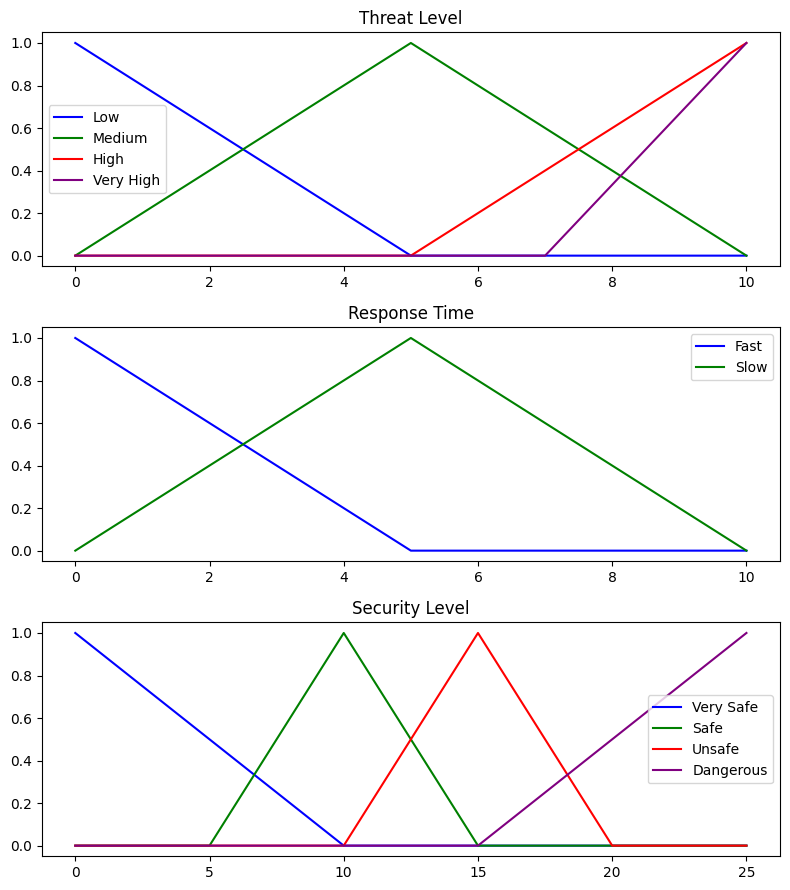

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Menghasilkan nilai x untuk fungsi keanggotaan
x_threat = np.arange(0, 11, 1)
x_response = np.arange(0, 11, 1)
x_security = np.arange(0, 26, 1)

# Membuat fungsi keanggotaan
threat_low = fuzz.trimf(x_threat, [0, 0, 5])
threat_medium = fuzz.trimf(x_threat, [0, 5, 10])
threat_high = fuzz.trimf(x_threat, [5, 10, 10])
threat_very_high = fuzz.trimf(x_threat, [7, 10, 10])

response_fast = fuzz.trimf(x_response, [0, 0, 5])
response_slow = fuzz.trimf(x_response, [0, 5, 10])

security_very_safe = fuzz.trimf(x_security, [0, 0, 10])
security_safe = fuzz.trimf(x_security, [5, 10, 15])
security_unsafe = fuzz.trimf(x_security, [10, 15, 20])
security_dangerous = fuzz.trimf(x_security, [15, 25, 25])

# Plotting
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_threat, threat_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_threat, threat_medium, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_threat, threat_high, 'r', linewidth=1.5, label='High')
ax0.plot(x_threat, threat_very_high, 'purple', linewidth=1.5, label='Very High')
ax0.set_title('Threat Level')
ax0.legend()

ax1.plot(x_response, response_fast, 'b', linewidth=1.5, label='Fast')
ax1.plot(x_response, response_slow, 'g', linewidth=1.5, label='Slow')
ax1.set_title('Response Time')
ax1.legend()

ax2.plot(x_security, security_very_safe, 'b', linewidth=1.5, label='Very Safe')
ax2.plot(x_security, security_safe, 'g', linewidth=1.5, label='Safe')
ax2.plot(x_security, security_unsafe, 'r', linewidth=1.5, label='Unsafe')
ax2.plot(x_security, security_dangerous, 'purple', linewidth=1.5, label='Dangerous')
ax2.set_title('Security Level')
ax2.legend()

plt.tight_layout()
plt.show()
